In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

import os

from hypers import weight_hypers
from hypers import alpha_hypers 

from experiment import Params
from experiment import run_experiments
from experiment import load_experiments
from experiment import draw_regrets

### Эксперимент

In [15]:
filepath = '../results/experiment_0.json'

seeds = 5 * np.arange(2, 4) + 111

params = Params(series_type = "default",
                from_start = False,
                a = -40,
                b = 40,
                dim = 10,
                low = -10,
                high = 10,
                clip = (-40, 40),
                workers_num = 3,
                length = 200,
                lower_bound = 10,
                upper_bound = 40,
                alternating=True)

different_noises = [1]
different_windows = [5, 10, 20]
different_wf = ["default"]
different_af = ["default"]


# experiments, df = run_experiments(filepath, seeds, params, different_noises, different_windows, different_wf, different_af)
experiments, df = load_experiments(filepath)

In [16]:
os.stat(filepath).st_size

361367

In [17]:
df

,noise_var,train_window,weight_function,alpha_function,mean,random_0,random_1
1,0.01,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),35549.40,37886.99,33211.82
0,0.01,5,1 / (x^1.01),1 / (x + 1),26107.95,28627.71,23588.19
3,0.01,20,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),50642.61,50296.09,50989.13
2,0.01,20,1 / (x^1.01),1 / (x + 1),35439.38,34614.0,36264.77
5,1,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),34169.84,37079.3,31260.39
4,1,5,1 / (x^1.01),1 / (x + 1),24988.86,28288.59,21689.13
7,1,20,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),49792.92,50507.68,49078.16
6,1,20,1 / (x^1.01),1 / (x + 1),35374.50,35439.19,35309.8
9,100,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),22075.20,16674.56,27475.85
8,100,5,1 / (x^1.01),1 / (x + 1),20468.95,17304.54,23633.36


In [5]:
df_w = df[df["alpha_function"] == alpha_hypers["default"].repr].iloc[:,:5]
df_w

,noise_var,train_window,weight_function,alpha_function,mean
1,0.01,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),35549.40
0,0.01,5,1 / (x^1.01),1 / (x + 1),26107.95
3,0.01,20,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),50642.61
2,0.01,20,1 / (x^1.01),1 / (x + 1),35439.38
5,1,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),34169.84
4,1,5,1 / (x^1.01),1 / (x + 1),24988.86
7,1,20,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),49792.92
6,1,20,1 / (x^1.01),1 / (x + 1),35374.50
9,100,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),22075.20
8,100,5,1 / (x^1.01),1 / (x + 1),20468.95


In [6]:
df_a = df[df["weight_function"] == weight_hypers["simple_101"].repr].iloc[:,:5]
df_a

,noise_var,train_window,weight_function,alpha_function,mean
0,0.01,5,1 / (x^1.01),1 / (x + 1),26107.95
2,0.01,20,1 / (x^1.01),1 / (x + 1),35439.38
4,1,5,1 / (x^1.01),1 / (x + 1),24988.86
6,1,20,1 / (x^1.01),1 / (x + 1),35374.50
8,100,5,1 / (x^1.01),1 / (x + 1),20468.95
10,100,20,1 / (x^1.01),1 / (x + 1),12638.12


In [7]:
df[["noise_var", "train_window", "mean"]].groupby(["noise_var", "train_window"]).mean()

mean
noise_var train_window           
0.01      5             30828.675
          20            43040.995
1.00      5             29579.350
          20            42583.710
100.00    5             21272.075
          20            13470.450

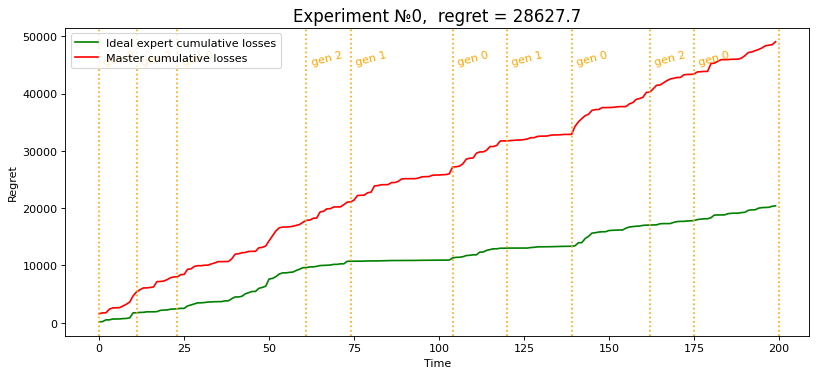

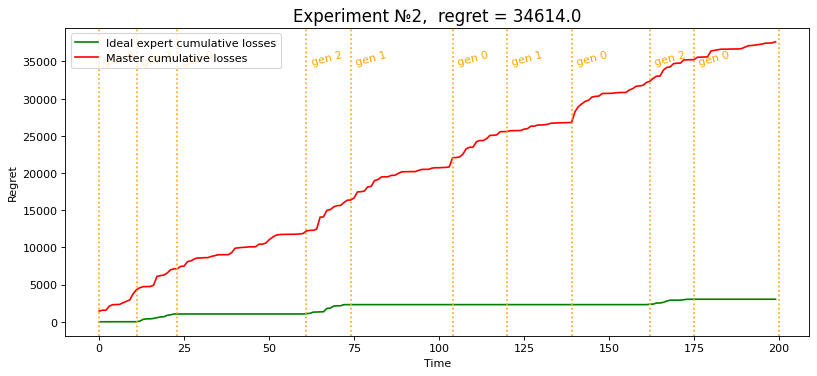

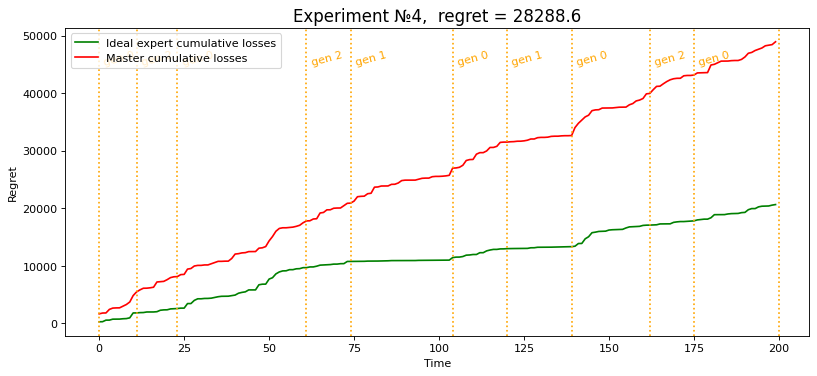

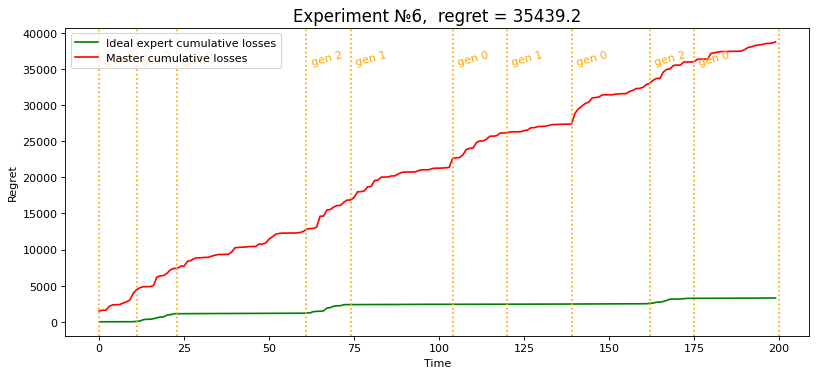

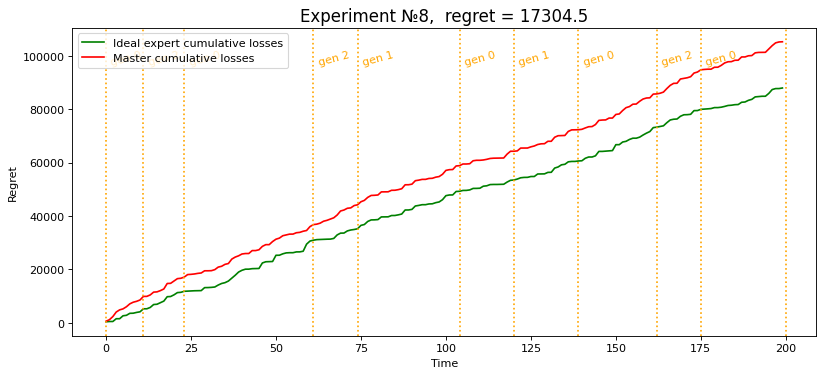

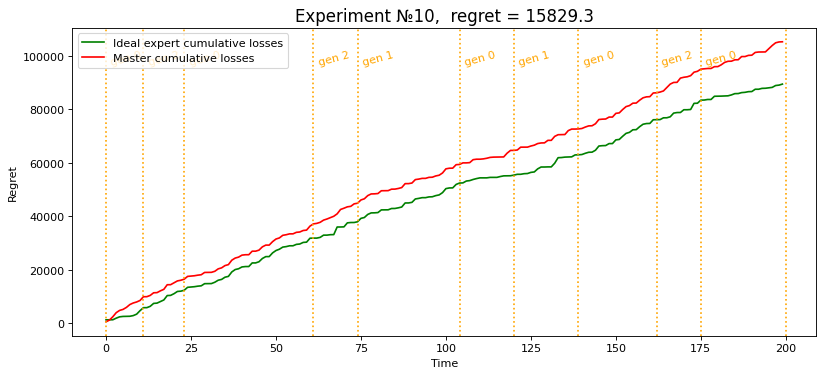

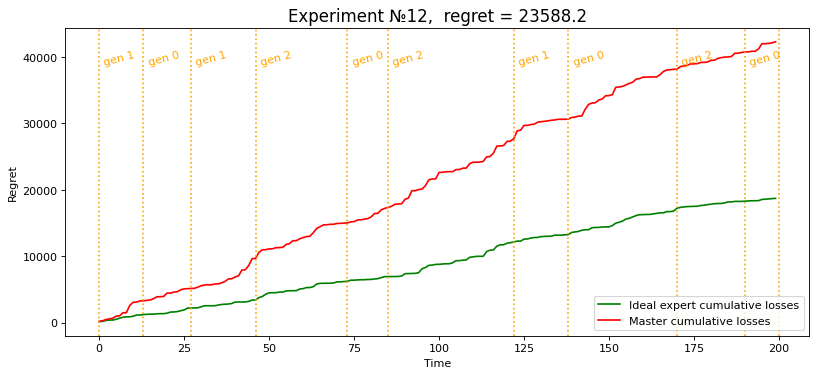

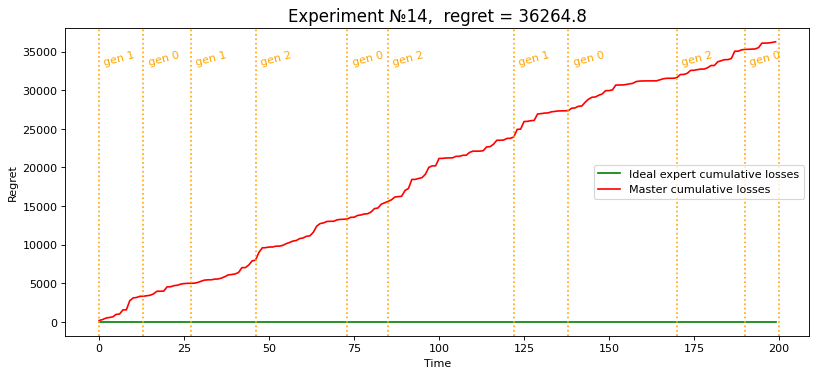

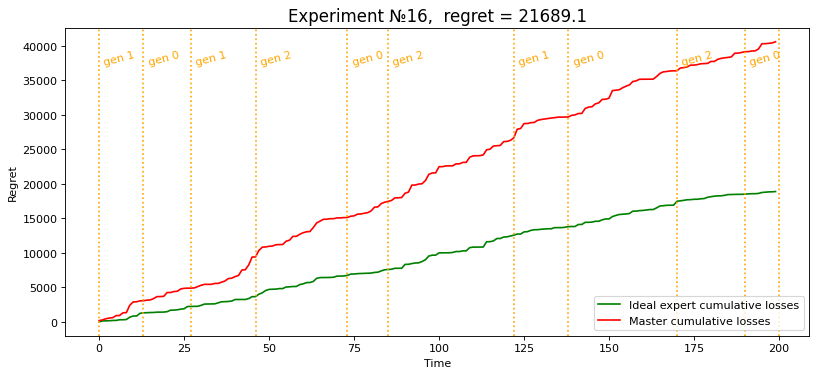

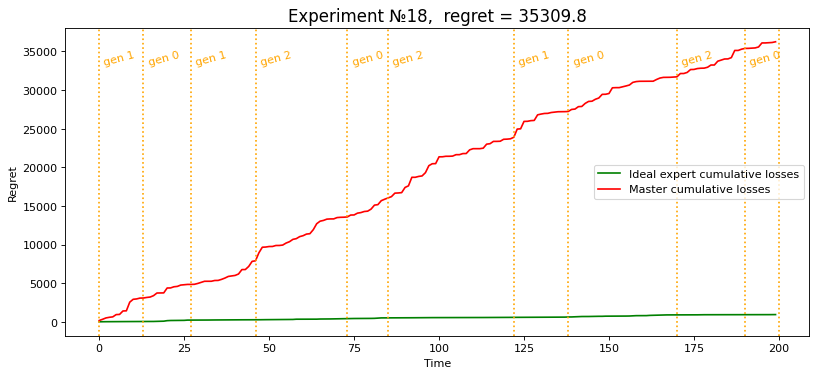

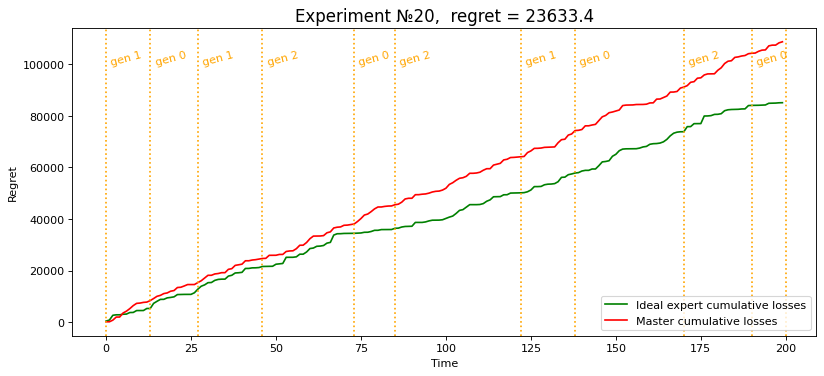

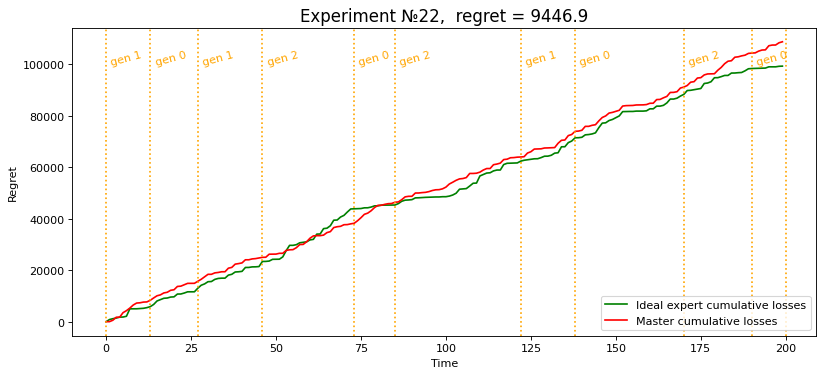

In [18]:
enumerated = [(num, experiment) for num, experiment in enumerate(experiments)]
for num, experiment in enumerated[::2]:
    draw_regrets(experiment.logs, show=["master", "ideal"], title=f"Experiment №{num},  regret = {experiment.regret:.1f}", fig_size=(12, 5))